In [1]:
# Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
# Previsão com séries temporais (ARIMA)

In [2]:
# Importação das bibliotecas
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.arima_model import ARIMA
import warnings
from pmdarima.arima import auto_arima
from datetime import datetime
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# Carregamento da base de dados, conversão do atributo para data e criação da série temporal (ts)
base = pd.read_csv('/home/luciano/GitHub/Treinamento_R_Python/Seção 28/dados/AirPassengers.csv')
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('/home/luciano/GitHub/Treinamento_R_Python/Seção 28/dados/AirPassengers.csv', parse_dates = ['Month'],
                   index_col = 'Month', date_parser = dateparse)
ts = base['#Passengers']

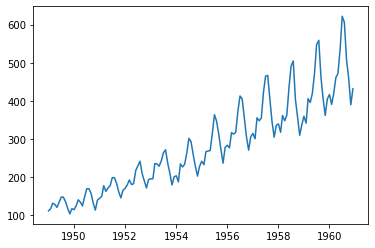

In [4]:
# Visualização da série temporal completa
plt.plot(ts)

In [5]:
# Criação do modelo ARIMA com os parâmetro p = 2, q = 1, d = 2, treinamento e visualização dos resultados
# Mais detalhes sobre o parâmetro freq: https://stackoverflow.com/questions/49547245/valuewarning-no-frequency-information-was-provided-so-inferred-frequency-ms-wi
warnings.filterwarnings("ignore")
modelo = ARIMA(ts, order=(2, 1, 2),freq=ts.index.inferred_freq) 
modelo_treinado = modelo.fit()
modelo_treinado.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.66135D+00    |proj g|=  4.80020D-02

At iterate    5    f=  4.65907D+00    |proj g|=  3.27003D-02

At iterate   10    f=  4.65821D+00    |proj g|=  1.03215D-03

At iterate   15    f=  4.65802D+00    |proj g|=  1.54774D-03

At iterate   20    f=  4.65767D+00    |proj g|=  1.21182D-02

At iterate   25    f=  4.65750D+00    |proj g|=  1.65334D-03

At iterate   30    f=  4.65750D+00    |proj g|=  2.74536D-04

At iterate   35    f=  4.65749D+00    |proj g|=  1.27098D-04

At iterate   40    f=  4.65749D+00    |proj g|=  1.55431D-05


 This problem is unconstrained.



At iterate   45    f=  4.65749D+00    |proj g|=  2.93099D-06

At iterate   50    f=  4.65749D+00    |proj g|=  6.31495D-05
  ys=-4.777E-09  -gs= 1.829E-09 BFGS update SKIPPED

At iterate   55    f=  4.65749D+00    |proj g|=  7.21201D-05

At iterate   60    f=  4.65749D+00    |proj g|=  9.05942D-06

At iterate   65    f=  4.65749D+00    |proj g|=  3.01981D-06

At iterate   70    f=  4.65749D+00    |proj g|=  2.75335D-06

At iterate   75    f=  4.65749D+00    |proj g|=  1.24345D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     78    128      1     1     0   7.994D-07   4.657D+00
  F =   4.6574944627792894     

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.715
Date:                Thu, 10 Feb 2022   AIC                           1344.043
Time:                        17:59:33   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5311      0.708      3.574      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9098      0.065    -29.511      0.000      -2.037      -1.783
ma.L2.D.#Passengers     0.9996      0.068     14.808      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9552           -0.2965j            1.0002           -0.0479
MA.2            0.9552           +0.2965j            1.0002            0.0479
-----------------------------------------------------------------------------
"""

In [6]:
# Previsões de 12 datas no futuro
previsoes = modelo_treinado.forecast(steps = 12)[0]
previsoes

array([433.12699386, 450.90453526, 479.8343606 , 511.99808179,
       539.34852031, 555.82713646, 558.76922835, 549.29372416,
       531.6675689 , 511.90393782, 496.03051061, 488.51085307])

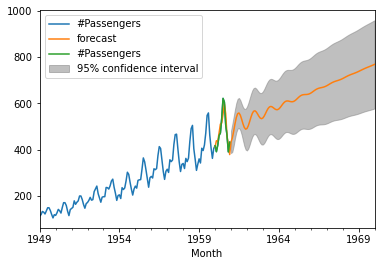

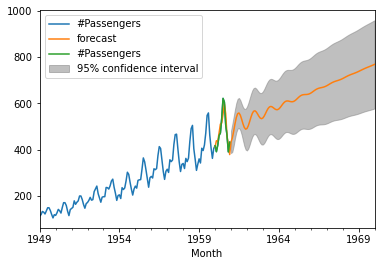

In [7]:
# Criação de eixo para a série temporal completa, com adição das previsões do modelo
#lot_insample = True dados originais
eixo = ts.plot()
modelo_treinado.plot_predict('1960-01-01', '1970-01-01',
                             ax = eixo, plot_insample = True)

In [8]:
# Implementação do auto arima para descoberta automática dos parâmetros
modelo_auto = auto_arima(ts, m = 12, seasonal = True, trace = False)
modelo_auto.summary()
# Warning abaixo são normais, de acordo com o link abaixo
#ConvergenceWarning: Maximum... https://github.com/statsmodels/statsmodels/issues/6157

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Thu, 10 Feb 2022   AIC                           1017.847
Time:                                     17:59:58   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.601      0.000      -1.057      -0.907
sigma2       129.3130     14.556      8.884      0.000     100.783     157.843
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
proximos_12 = modelo_auto.predict(n_periods = 12)
# Visualização dos próximos 12 valores
proximos_12 

array([445.63488087, 420.3949451 , 449.19824485, 491.83985608,
       503.39436987, 566.86232937, 654.26004163, 638.59734162,
       540.88358496, 494.12645479, 423.33253479, 465.50739497])